In [3]:
import numpy as np
import pandas as pd
import imageio
import matplotlib.pyplot as plt
import glob
import os

from skimage import measure
from skimage.io import imsave, imread
from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu

def show_image_contours(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

# 2 Vidéo tracking

Dans cet exercise on va réaliser du tracking vidéo, l'idée est d'identifier un objet sur une séquence d'images assez courte (environ 15 secondes) et d'obtenir des informations sur la trajectoire de cet objet.

Dans un premier temps à partir de la vidéo on va tenter de créer une suite d'images

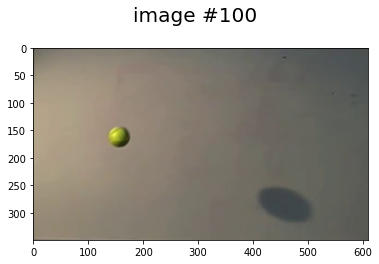

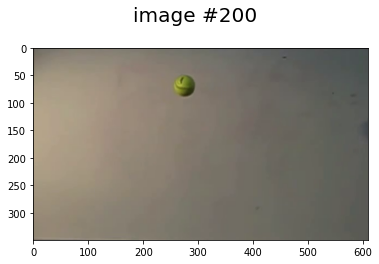

In [4]:
filename = 'data/misc/ball.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')
nums = [100, 200]
for num in nums:
    image = vid.get_data(num)
    fig = plt.figure()
    fig.suptitle('image #{}'.format(num), fontsize=20)
    plt.imshow(image[:-10, 15:-15])
plt.show()


#### 📝 Q1: En utilisant la fonction makedirs de la librarie 'os' créer un dossier 'out' dans lequel vous enregistrerez les images de la vidéo.

#### 📝 Q2: Enregistrez chaque image croppée (__avec les mêmes coordonnées [:-10, 15:-15] que dans la cellule précédente__) dont le nom sera son index dans le dossier 'path_out'.

#### 📝 Q3: En utilisant la fonction glob de la librarie 'glob' vérifier le nombre d'images jpg contenues dans le dossier de sortie 'out'.

In [3]:
path_out = 'out'

#Q1: Create the output folder to store the frames
""""""
...
""""""
for i, frame in enumerate(vid): #For each frame n°i in vid
    #Q2: Save frame in output folder
    _path = '{}/{}.jpg'.format(path_out, i)
    """"""
    ...frame[:-10, 15:-15]
    """"""
    
#Check the content of the output folder
""""""
n_images = ...
""""""

print('Le dossier contient {} images'.format(n_images))

Le dossier contient 430 images


#### 📝 Q4: Charger img_rgb: la 100ème image du dossier et affichez la.

#### 📝 Q5: A l'aide de la fonction 'rgb2hsv' de librairie 'skimage' convertissez l'image RGB dans le domaine HSV et affichez separément les canaux H, S et V.

#### 📝 Q6: Que remarquez vous sur le canal dont l'indice est 2.

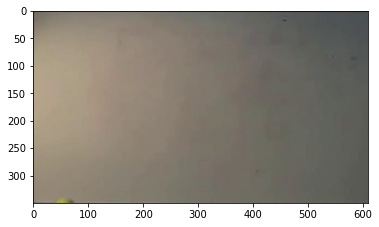

In [4]:
idx = 100
img_rgb = imread('{}/{}.jpg'.format(path_out, idx))

plt.imshow(...)

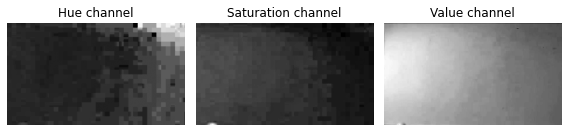

In [5]:
""""""
hsv_img = ...
hue_img = ...
saturation_img = ...
value_img = ...
""""""

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(hue_img, cmap='gray')
ax0.set_title("Hue channel")
ax0.axis('off')
ax1.imshow(saturation_img, cmap='gray')
ax1.set_title("Saturation channel")
ax1.axis('off')
ax2.imshow(value_img, cmap='gray')
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

Q7: Que remarquez vous sur le canal dont l'indice est 2.

Q8: En utilisant le code suivant, jouez avec la valeur de saturation_threshold pour effectuer une segmentation efficace de l'image, quelle valeure obtenez vous ?

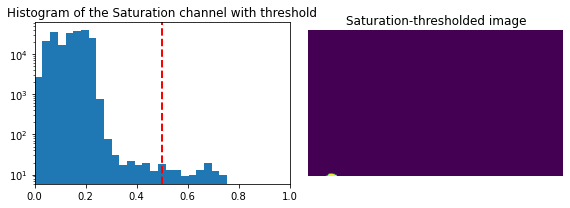

In [6]:
""""""
saturation_threshold = ...
""""""
binary_img = saturation_img > saturation_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(saturation_img.ravel(), 25)
ax0.set_yscale('log')
ax0.set_title("Histogram of the Saturation channel with threshold")
ax0.axvline(x=saturation_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 1)
ax1.imshow(binary_img)
ax1.set_title("Saturation-thresholded image")
ax1.axis('off')

fig.tight_layout()

#### 📝 Q9: En utilisant la fonction 'find_contours' de skimage réaliser l'extraction du contour de la balle depuis l'image binarisée avec le paramètre 'level=0.8'.

#### 📝 Q10: Avec la fonction 'show_image_contours' affichez le tracer du contour de la balle sur l'image originale.

#### 📝 Q11: All right ? Combien de contours contient l'object 'contours' ? Note : bien regarder sur le côté

L'object contours contient 1 contours


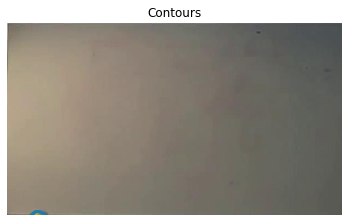

In [8]:
""""""
contours = ...
""""""

""""""
show_image_contours(..., ...)
""""""

""""""
n_contours = ...
""""""
print('L\'object contours contient {} contours'.format(n_contours))

On va uniquement garder le contours le plus grand si contours en contient plusieurs.

In [9]:
dots_contours = [np.shape(cnt)[0] for cnt in contours]
idx = np.argmax(dots_contours)

contours = [contours[idx]]
print('L\'object contours contient {} contours'.format(len(contours)))

c = contours[0].mean(axis=0)

print('Le centre du contour se trouve aux coordonnées [x, y]=[{:.2f}, {:.2f}]'.format(c[0], c[1]))

L'object contours contient 1 contours
Le centre du contour se trouve aux coordonnées [x, y]=[345.92, 55.51]


#### 📝 Q12: Affichez l'unique contour souhaité.

''

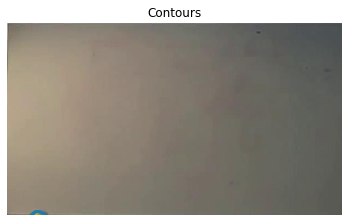

In [11]:
""""""
show_image_contours(..., ...)
""""""

Q13: Complétez la fonction suivante pour qu'elle retourne systématiquement le centre de la balle. Vous devriez trouver le même résultat que celui affiché juste avant la Q12.

In [19]:
def getPos(img_rgb):
    hsv_img = ...
    saturation_img = ...
    binary_img = ...
    contours = ...
    
    n_contours = len(contours)
    if(n_contours > 1):
        dots_contours = [np.shape(cnt)[0] for cnt in contours]
        idx = np.argmax(dots_contours)
        contours = [contours[idx]]
    
    if(n_contours > 0):
        c = contours[0].mean(axis=0)
        return c

On va calculer les positions de la balle entre la 23ème (inclue) et la 388ème image (inclue)

#### 📝 Q14: Dessinez le graphe de la position de la balle.

In [13]:
pos = np.array([getPos(imread('{}/{}.jpg'.format(path_out, i))) for i in range(23, 388+1)])

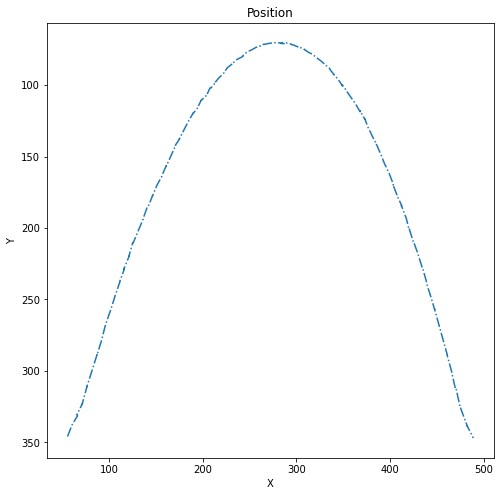

In [15]:
""""""
Y, X = 
""""""
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.plot(X, Y, '-.')
ax.invert_yaxis()
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.set_title('Position')
plt.show()